In [1]:
### Import libraries

%matplotlib inline
import xarray as xr
from netCDF4 import Dataset

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

import cartopy.crs as ccrs

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [2]:
### Base path to files
base_path = '{path_to_main_folder}'

In [3]:
### Locations

# Forwards release locations [°]
lons_fw = np.array([-55., -50., -45., -40., -35.,
                    -30., -25., -20., -15., -10.,
                     -5.,   0.,   5.,  10.,  15.,
                     20.,  25.,  30.,  35.,  40.,
                     45.,  50.,  55.,  60., -57.82330253,
                     -59.25, -60.08662877, -60.01036191, -58.82106809])
lats_fw = np.array([-77.99537227, -78.45787684, -79.17977465, -79.75459498, -79.99027112,
                    -80.07689735, -79.9997914 , -80.12097168, -79.24559138, -78.39033646,
                    -77.33178711, -76.13251966, -75.17986379, -74.68456009, -73.6896764 ,
                    -73.53134648, -72.9724492 , -72.3117251 , -72.29006817, -72.16268516,
                    -70.86573029, -68.58359528, -68.58359528, -66.59729004, -77.,
                    -75.        , -73.        , -71.        , -69.        ])

In [4]:
# Load data Nooteboom et al. (2022)
topo = xr.open_dataset(base_path + '{path_to_created_bathymetry}/adapted_bathymetry.nc')

# Select coastal region Weddell Sea

Select (shelf) regions till maximum 500 metres water depth and show:

In [5]:
reg = np.where(topo['Bathymetry']<-500., 0, 1)
topo['Region'] = (('j_index', 'i_index'), reg)

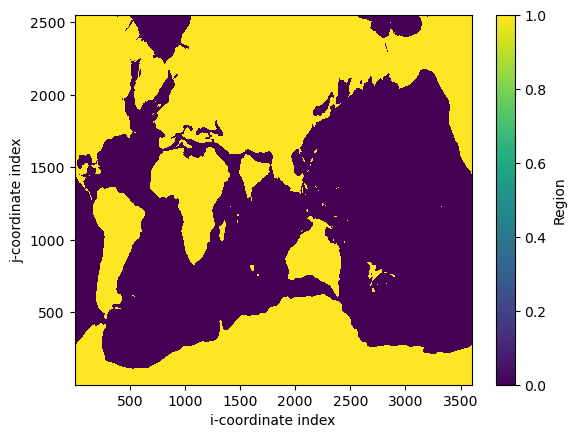

In [6]:
topo['Region'].plot();

Select the longitudinal range: select region east of 74°W...

In [7]:
topo['Region'] = topo['Region'].where(topo['U_LON_2D']>-74., other=0)

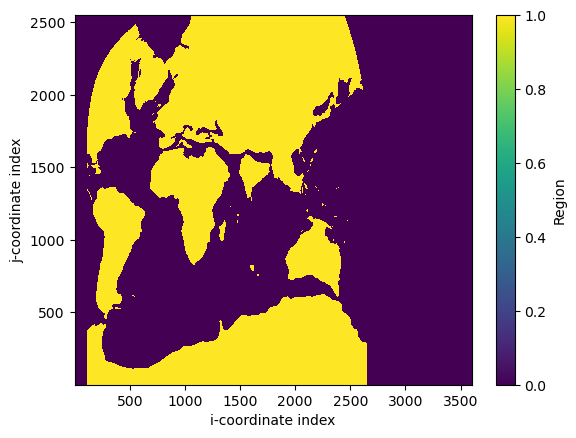

In [8]:
topo['Region'].plot();

... and west of 62°E

In [9]:
topo['Region'] = topo['Region'].where(topo['U_LON_2D']<62., other=0)

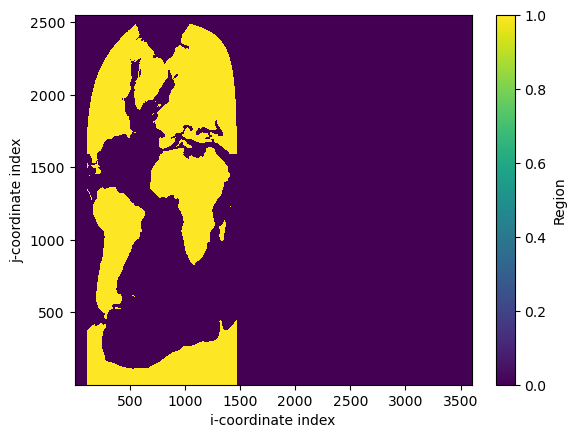

In [10]:
topo['Region'].plot();

Select longitudinal range: south of 66°S

In [11]:
topo['Region'] = topo['Region'].where(topo['U_LAT_2D']<-66., other=0)

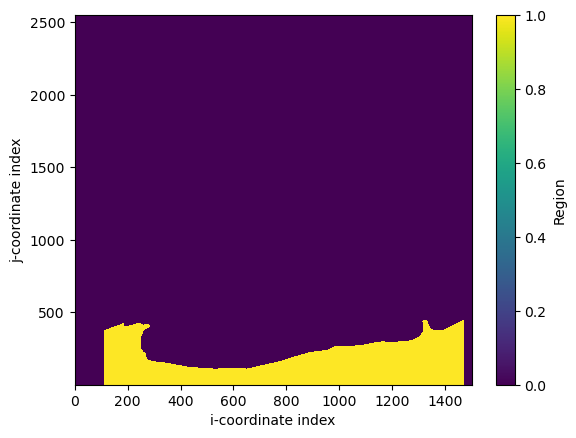

In [12]:
topo['Region'].plot(xlim=(0,1500));

We are only interested in the marine environment: select below 0 metres.

In [13]:
topo['Region'] = topo['Region'].where(topo['Bathymetry']<=0., other=0)

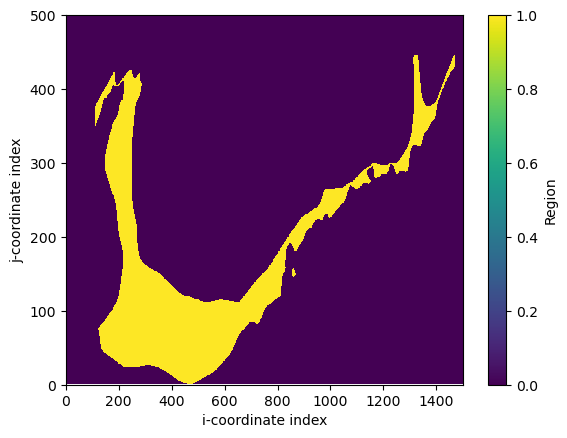

In [14]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

Zoom in for further selection: select and remove region northwest of the Antarctic Peninsula

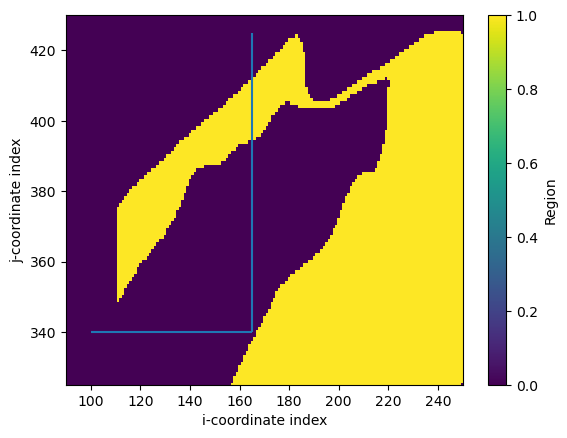

In [15]:
topo['Region'].plot(xlim=(90,250), ylim=(325,430))
plt.hlines(340,100,165)
plt.vlines(165,340,425);

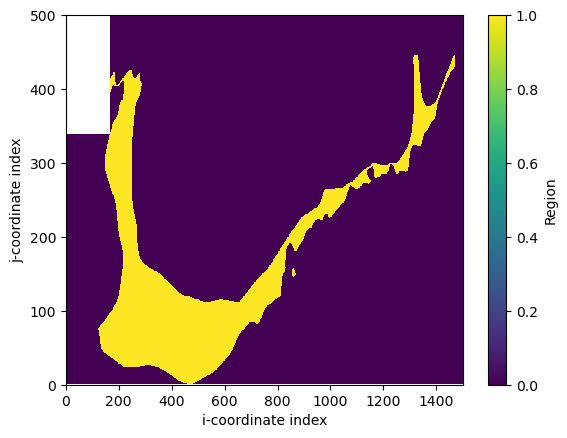

In [16]:
topo['Region'].where((topo['i_index']>165)|(topo['j_index']<340)).plot(xlim=(0,1500), ylim=(0,500));

In [17]:
topo['Region'] = topo['Region'].where((topo['i_index']>165)|(topo['j_index']<340), other=0)

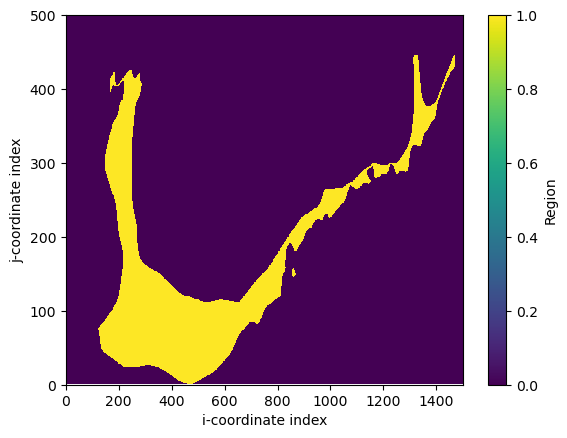

In [18]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

Select and remove region slightly northward of northernmost release location:

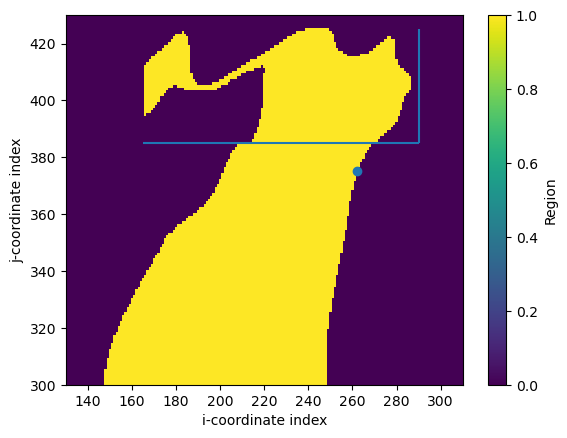

In [19]:
topo['Region'].plot(xlim=(130,310), ylim=(300,430))
plt.scatter(topo['j_index'][261], topo['i_index'][374]) # northernmost release location
plt.hlines(385,165,290)
plt.vlines(290,385,425);

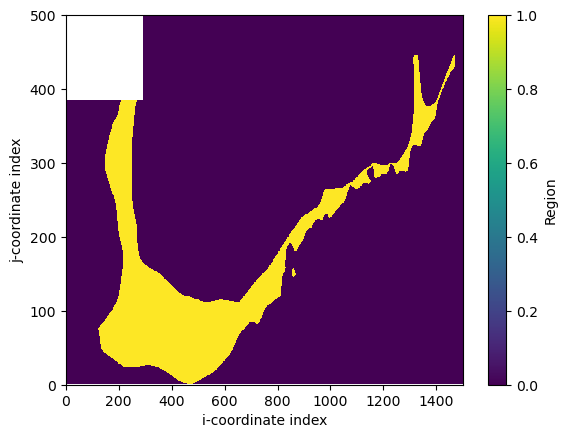

In [20]:
topo['Region'].where((topo['i_index']>290)|(topo['j_index']<385)).plot(xlim=(0,1500), ylim=(0,500));

In [21]:
topo['Region'] = topo['Region'].where((topo['i_index']>290)|(topo['j_index']<385), other=0)

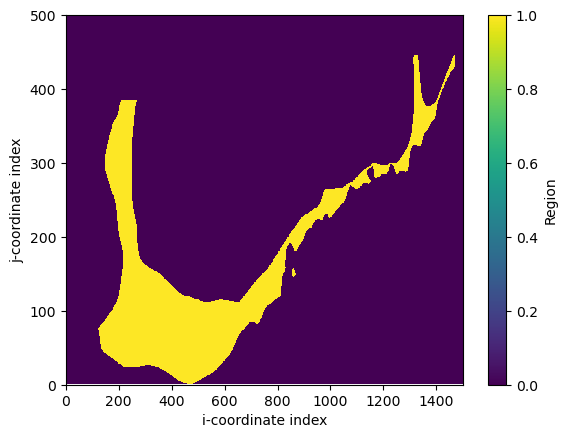

In [22]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

# Divide into coastal regions Carter et al. (2017)

Draw lines between coastal regions by visual comparison to coastal regions of Carter et al. (2017).

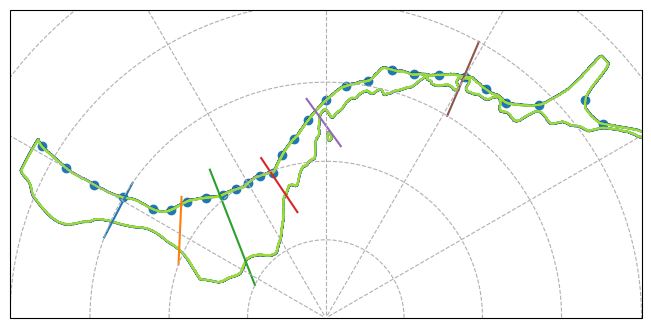

In [23]:
### General settings figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo()}, figsize=(10,4))
ax.set_extent([-90, 90, -85, -70], ccrs.PlateCarree())
ax.gridlines(linestyle='--')

### Plot main figure
# Release locations
ax.scatter(lons_fw, lats_fw, transform=ccrs.PlateCarree())

# Coastal region
ax.contour(topo['U_LON_2D'], topo['U_LAT_2D'], topo['Region'], transform=ccrs.PlateCarree())

# Coastal region separation lines
ax.plot([-70,-55], [-75,-75], transform=ccrs.PlateCarree()) # 1 - 2
ax.plot([-70,-50], [-80,-78], transform=ccrs.PlateCarree()) # 2 - 3
ax.plot([-65,-38], [-85,-78], transform=ccrs.PlateCarree()) # 3 - 4
ax.plot([-22,-15], [-79,-83], transform=ccrs.PlateCarree()) # 4 - 5
ax.plot([-5,   5], [-76,-79], transform=ccrs.PlateCarree()) # 5 - 6a
ax.plot([31,  29], [-75,-70], transform=ccrs.PlateCarree()) # 6a - 6b

plt.show()

## North Graham Land

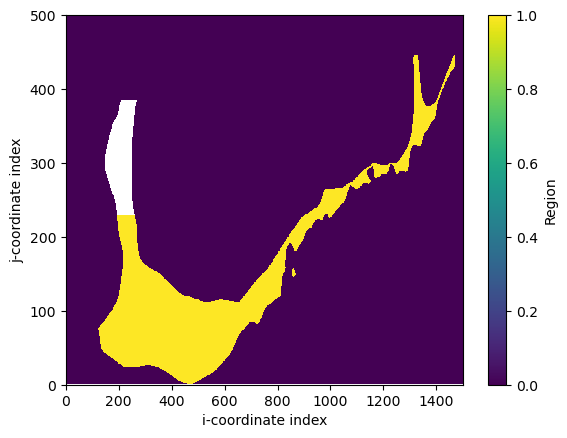

In [24]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0)).plot(xlim=(0,1500),
                                                                                           ylim=(0,500));

In [25]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0), other=8)

## Palmer Land

In [26]:
ytst = (4*topo['i_index'])/25 + 104

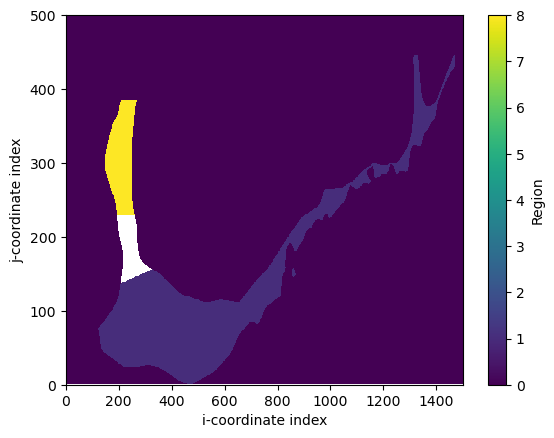

In [27]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<ytst)|(topo['Region']==0)|
                     (topo['Region']==8)).plot(xlim=(0,1500), ylim=(0,500));

In [28]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<ytst)|
                                      (topo['Region']==0)|(topo['Region']==8), other=2)

## Ellsworth Mountains

In [29]:
ytst = (3*topo['i_index'])/5 - 120

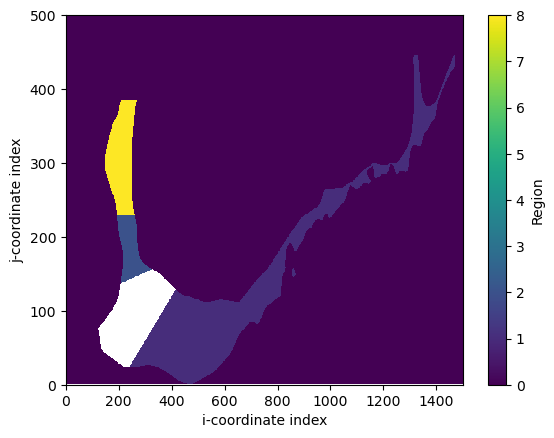

In [30]:
topo['Region'].where((topo['i_index']>500)|(topo['j_index']<ytst)|(topo['Region']==0)|
                     (topo['Region']==8)|(topo['Region']==2)).plot(xlim=(0,1500), ylim=(0,500));

In [31]:
topo['Region'] = topo['Region'].where((topo['i_index']>500)|(topo['j_index']<ytst)|
                                      (topo['Region']==0)|(topo['Region']==8)|
                                      (topo['Region']==2), other=3)

## Filchner Ice Shelf

In [32]:
ytst = (-3*topo['i_index'])/4 + (1125./2)

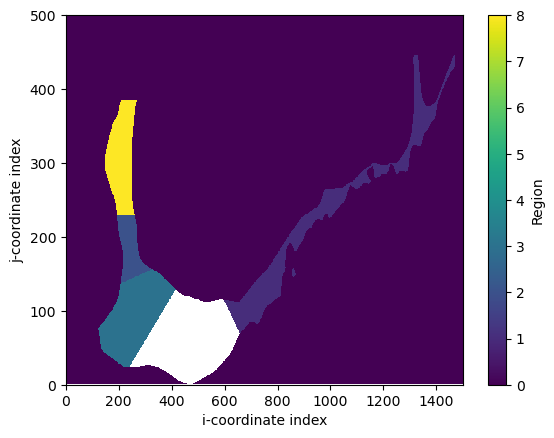

In [33]:
topo['Region'].where((topo['i_index']>750)|(topo['j_index']>ytst)|(topo['Region']==0)|
                     (topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)).plot(xlim=(0,1500),
                                                                                       ylim=(0,500));

In [34]:
topo['Region'] = topo['Region'].where((topo['i_index']>750)|(topo['j_index']>ytst)|
                                      (topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|
                                      (topo['Region']==3), other=4)

## Coats Land

In [35]:
ytst = (-topo['i_index'])/2 + 600

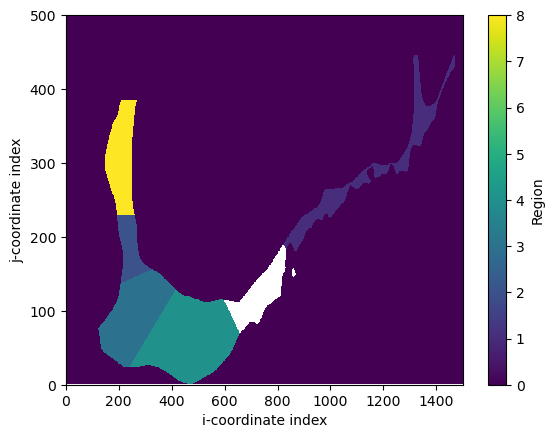

In [36]:
topo['Region'].where((topo['i_index']>950)|(topo['j_index']>ytst)|(topo['Region']==0)|
                     (topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|
                     (topo['Region']==4)).plot(xlim=(0,1500), ylim=(0,500));

In [37]:
topo['Region'] = topo['Region'].where((topo['i_index']>950)|(topo['j_index']>ytst)|
                                      (topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|
                                      (topo['Region']==3)|(topo['Region']==4), other=5)

## Dronning Maud Land - West

In [38]:
ytst = -(10*topo['i_index'])/7 + 13550./7

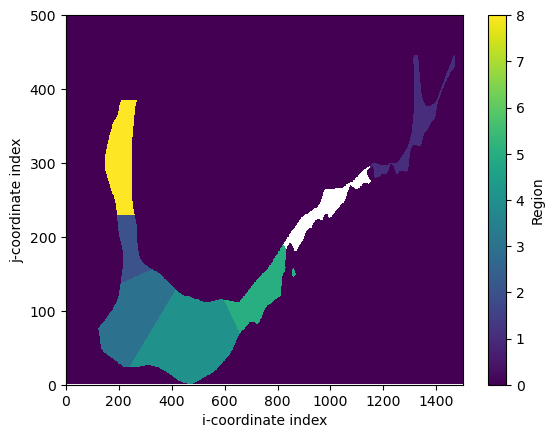

In [39]:
topo['Region'].where((topo['i_index']>1200)|(topo['j_index']>ytst)|(topo['Region']==0)|
                     (topo['Region']==8)|(topo['Region']==2)|(topo['Region']==3)|
                     (topo['Region']==4)|(topo['Region']==5)).plot(xlim=(0,1500), ylim=(0,500));

## Dronning Maud Land - East

In [40]:
topo['Region'] = topo['Region'].where((topo['i_index']>1200)|(topo['j_index']>ytst)|
                                      (topo['Region']==0)|(topo['Region']==8)|(topo['Region']==2)|
                                      (topo['Region']==3)|(topo['Region']==4)|(topo['Region']==5), other=6)

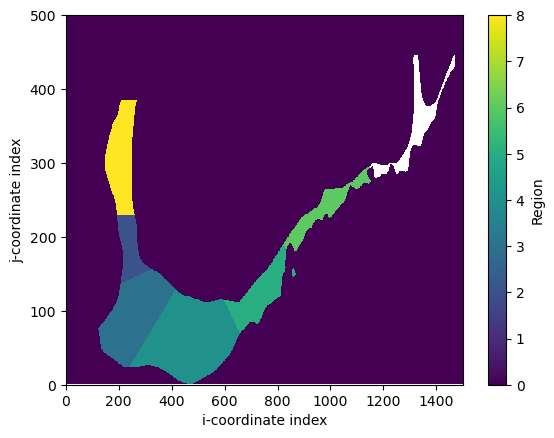

In [41]:
topo['Region'].where((topo['j_index']<ytst)|(topo['Region']==0)).plot(xlim=(0,1500), ylim=(0,500));

## All regions

In [42]:
topo['Region'] = topo['Region'].where((topo['j_index']<ytst)|(topo['Region']==0), other=7)

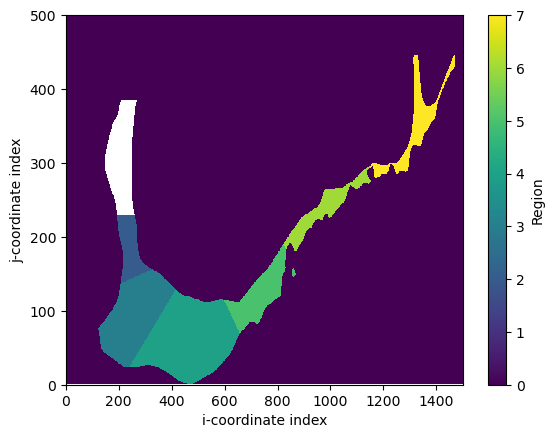

In [43]:
topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0)).plot(xlim=(0,1500),
                                                                                           ylim=(0,500));

In [44]:
topo['Region'] = topo['Region'].where((topo['i_index']>400)|(topo['j_index']<230)|(topo['Region']==0), other=1)

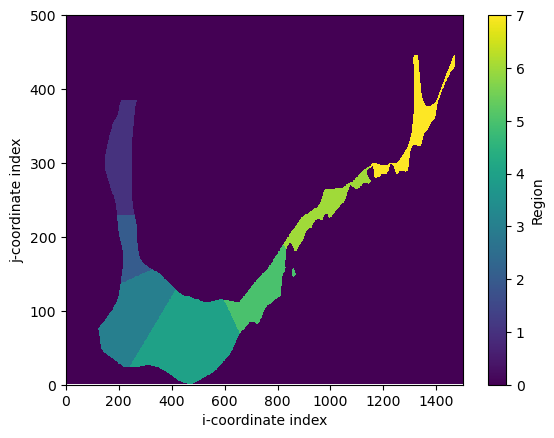

In [45]:
topo['Region'].plot(xlim=(0,1500), ylim=(0,500));

Show with lines to compare

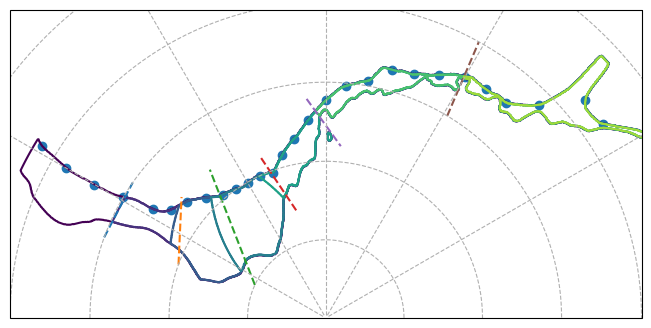

In [46]:
### General settings figure
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.SouthPolarStereo()}, figsize=(10,4))
ax.set_extent([-90, 90, -85, -70], ccrs.PlateCarree())
ax.gridlines(linestyle='--')
    
### Plot main figure
# Release locations
ax.scatter(lons_fw, lats_fw, transform=ccrs.PlateCarree())

# Coastal region
ax.contour(topo['U_LON_2D'], topo['U_LAT_2D'], topo['Region'], transform=ccrs.PlateCarree())

# Coastal region separation lines
ax.plot([-70,-55], [-75,-75], transform=ccrs.PlateCarree(), linestyle='--') # 1 - 2
ax.plot([-70,-50], [-80,-78], transform=ccrs.PlateCarree(), linestyle='--') # 2 - 3
ax.plot([-65,-38], [-85,-78], transform=ccrs.PlateCarree(), linestyle='--') # 3 - 4
ax.plot([-22,-15], [-79,-83], transform=ccrs.PlateCarree(), linestyle='--') # 4 - 5
ax.plot([-5,   5], [-76,-79], transform=ccrs.PlateCarree(), linestyle='--') # 5 - 6a
ax.plot([31,  29], [-75,-70], transform=ccrs.PlateCarree(), linestyle='--') # 6a - 6b

plt.show()

# Create new dataset

In [47]:
# Name dataset
dataset = Dataset('bathymetry_regions.nc', 'w')

In [48]:
# Dimensions
i_indexs = dataset.createDimension('i_index', 3600)
j_indexs = dataset.createDimension('j_index', 2400+150)

In [49]:
# Variables
ins         = dataset.createVariable('i_index', np.float32,('i_index',))
jns         = dataset.createVariable('j_index', np.float32,('j_index',))
latitudes   = dataset.createVariable('T_LAT_2D', np.float32,('j_index','i_index',))
longitudes  = dataset.createVariable('T_LON_2D', np.float32,('j_index','i_index',))
latitudes2  = dataset.createVariable('U_LAT_2D', np.float32,('j_index','i_index',))
longitudes2 = dataset.createVariable('U_LON_2D', np.float32,('j_index','i_index',))
bathymetry  = dataset.createVariable('bathymetry', np.float32,('j_index','i_index',))
regions     = dataset.createVariable('region', np.int32,('j_index','i_index',))

In [50]:
# Write data
ins[:]         = topo['i_index'][:]
jns[:]         = topo['j_index'][:]
latitudes[:]   = topo['T_LAT_2D'][:]
longitudes[:]  = topo['T_LON_2D'][:]
latitudes2[:]  = topo['U_LAT_2D'][:]
longitudes2[:] = topo['U_LON_2D'][:]
bathymetry[:]  = topo['Bathymetry'][:]
regions[:]     = topo['Region'][:]

In [51]:
# Attributes
latitudes.long_name   = 'latitude on t-grid'
latitudes.units       = 'degrees N'
longitudes.long_name  = 'longitude on t-grid'
longitudes.units      = 'degrees N'
latitudes2.long_name  = 'latitude on u-grid'
latitudes2.units      = 'degrees N'
longitudes2.long_name = 'longitude on u-grid'
longitudes2.units     = 'degrees N'
ins.long_name         = 'i-coordinate index'
jns.long_name         = 'j-coordinate index'
regions.long_name     = 'region index'

In [52]:
dataset.close()

## Test created file

In [53]:
### Load and view data
regs = xr.open_dataset(base_path + '{OPTIONAL_path_to_designated_folder}/bathymetry_regions.nc')
regs

<xarray.Dataset>
Dimensions:     (i_index: 3600, j_index: 2550)
Coordinates:
  * i_index     (i_index) float32 1.0 2.0 3.0 ... 3.598e+03 3.599e+03 3.6e+03
  * j_index     (j_index) float32 1.0 2.0 3.0 ... 2.548e+03 2.549e+03 2.55e+03
Data variables:
    T_LAT_2D    (j_index, i_index) float32 ...
    T_LON_2D    (j_index, i_index) float32 ...
    U_LAT_2D    (j_index, i_index) float32 ...
    U_LON_2D    (j_index, i_index) float32 ...
    bathymetry  (j_index, i_index) float32 ...
    region      (j_index, i_index) int32 ...

Study possible values regions

In [54]:
np.unique(regs['region'])

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

Plot regions on map

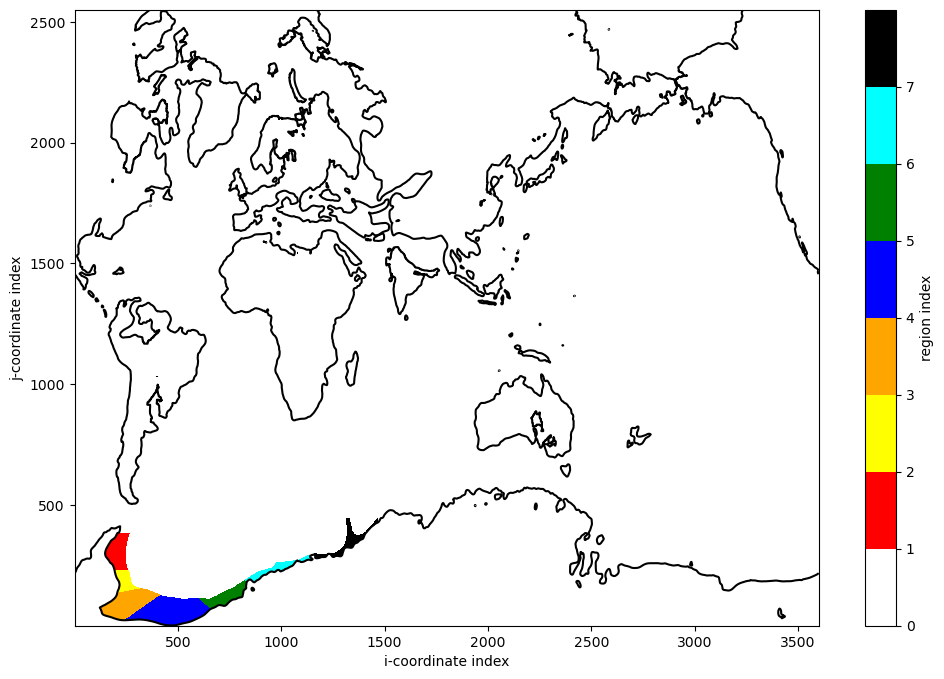

In [55]:
# Define colours and boundaries
cmap = colors.ListedColormap(['white', 'red', 'yellow', 'orange', 'blue', 'green', 'cyan', 'black'])
bounds =[0.,1.,2.,3.,4.,5.,6.,7.,8.]
norm = colors.BoundaryNorm(bounds, cmap.N)

### Plot
plt.figure(figsize=(12,8))
ax = plt.axes()
ax.set_xlim(-80,70)
ax.set_ylim(-90,-60)

regs['region'].plot(ax=ax, cmap=cmap, norm=norm, cbar_kwargs={'ticks': [0, 1, 2, 3, 4, 5, 6, 7],
                                                              'spacing': 'proportional'})
regs['bathymetry'].plot.contour(ax=ax, levels=[0], colors='k')

plt.show();

Show with release locations

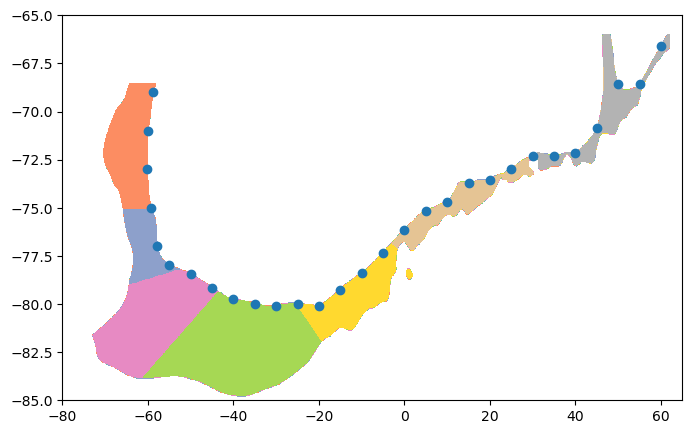

In [56]:
plt.figure(figsize=(8,5))
ax = plt.axes()

# Release locations
ax.scatter(lons_fw, lats_fw, zorder=5)

# Release regions
ax.contourf(regs['U_LON_2D'].values, regs['U_LAT_2D'].values, regs['region'].values,
            levels=[-1,0,1,2,3,4,5,6,7], cmap='Set2')

ax.set_xlim(-80,65)
ax.set_ylim(-85,-65)
plt.show();